# US Flights of 2008
## by (Ahmed Almalki)

## Investigation Overview

> Exploring US flights of 2008 and answering on:-
> - what are the best states in terms of delayed and cancelled flighes?
> - what are the best airlines in terms of delayed and cancelled flighes?
> - what are the worst flights in terms of delayed and cancelled flighes?

## Dataset Overview

> The dataset reports flights in the United States, including carriers, arrival and departure delays from 1987 to 2008. Actually, the report treated flight details of 2008 which is (7,009,728) observations.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [3]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('2008.csv')
df_airports = pd.read_csv('airports.csv')
df_airlines = pd.read_csv('carriers.csv')

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## (Visualization 1)

> Write a comment about your visualization here. The visualization should be in
the next cell, as a sub-slide type. Make sure your visualizations are polished!

In [278]:
airlines_mean = df.groupby('UniqueCarrier', as_index=False).mean()
airlines_count = df.groupby('UniqueCarrier', as_index=False).count()

airlines = airlines_mean[['UniqueCarrier','ArrDelay','Cancelled']].merge(
    airlines_count[['UniqueCarrier','Year']], on='UniqueCarrier'
)
airlines.rename(columns={'Year':'Count'}, inplace=True)

airlines['Size'] = airlines.Count.map(lambda x: round((x/100000)-.5)+1)
airlines['Size'] = airlines.Size.map(lambda x: 5 if x>5 else x)

In [279]:
airlines.Size.value_counts()

5    7
3    5
2    3
1    3
4    2
Name: Size, dtype: int64

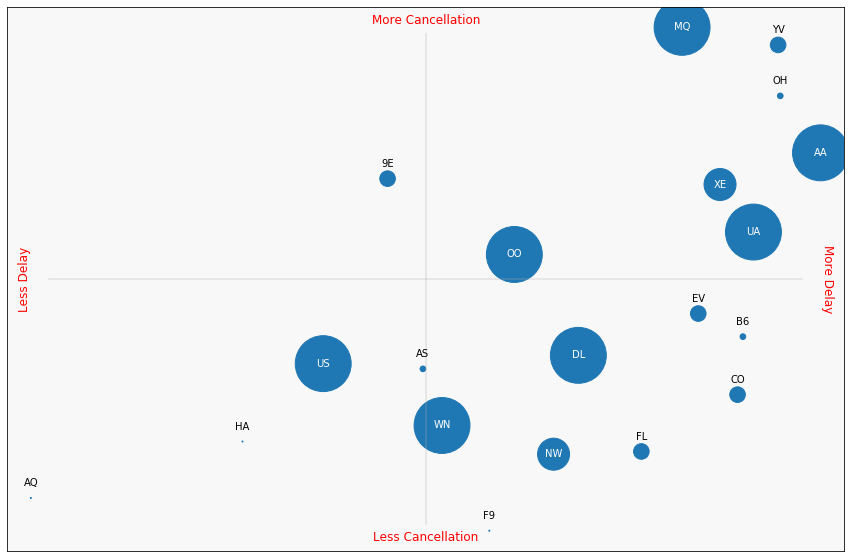

In [280]:

plt.figure(figsize=[15,10])
ax = plt.subplot()
ax.scatter(airlines.ArrDelay, airlines.Cancelled, s=airlines.Size**5, c='C0')

x_max = max(airlines.ArrDelay)
x_min = min(airlines.ArrDelay)

y_max = max(airlines.Cancelled)
y_min = min(airlines.Cancelled)

x_len =  x_max - x_min
y_len =  y_max - y_min

x = x_len*.03
y = y_len*.04

ax.set_xlim(x_min-x, x_max+x)
ax.set_ylim(y_min-y, y_max+y)

ax.axhline(y=y_max-(y_len/2), xmin=.05, xmax=.95, color='darkgray', alpha=.3) 
ax.axvline(x=x_max-(x_len/2), ymin=.05, ymax=.95, color='darkgray', alpha=.3)

ax.text(x_min,y_max-(y_len/2),'Less Delay', rotation=90, fontsize=12, color='r', ha='right', va='center')
ax.text(x_max,y_max-(y_len/2),'More Delay', rotation=-90, fontsize=12, color='r', ha='left', va='center')

ax.text(x_max-(x_len/2),y_min,'Less Cancellation', rotation=0, fontsize=12, color='r', ha='center', va='top')
ax.text(x_max-(x_len/2),y_max,'More Cancellation', rotation=0, fontsize=12, color='r', ha='center', va='bottom')
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

ax.set_facecolor('#f8f8f8')

for i, name in enumerate(airlines.UniqueCarrier):
    if(airlines.Size[i]>3):
        ax.text(airlines.ArrDelay[i], airlines.Cancelled[i], name, ha='center', va='center', color='w')
    else:
        ax.text(airlines.ArrDelay[i], airlines.Cancelled[i]+.001, name, ha='center', va='center', color='k')

In [281]:
airlines[['UniqueCarrier','Count','Size']]

,UniqueCarrier,Count,Size
0,9E,262208,3
1,AA,604885,5
2,AQ,7800,1
3,AS,151102,2
4,B6,196091,2
5,CO,298455,3
6,DL,451931,5
7,EV,280575,3
8,F9,95762,1
9,FL,261684,3


In [229]:
print(df_airlines[df_airlines.Code.isin(airlines.UniqueCarrier)])

     Code                                        Description
84     9E                             Pinnacle Airlines Inc.
100    AA                             American Airlines Inc.
206    AQ                                Aloha Airlines Inc.
221    AS                               Alaska Airlines Inc.
263    B6                                    JetBlue Airways
377    CO                         Continental Air Lines Inc.
441    DL                               Delta Air Lines Inc.
505    EV                        Atlantic Southeast Airlines
517    F9                             Frontier Airlines Inc.
537    FL                        AirTran Airways Corporation
619    HA                             Hawaiian Airlines Inc.
848    MQ                       American Eagle Airlines Inc.
920    NW                            Northwest Airlines Inc.
936    OH                                        Comair Inc.
949    OO                              Skywest Airlines Inc.
1297   UA               

Good
Big= Southwest Airlines, US Airways
sml= Aloha Airlines, Hawaiian Airlines, Alaska Airlines

Bad
big= American Airlines, American Eagle Airlines, United Air Lines
mid= Expressjet Airlines, Mesa Airlines
sml= Comair 

## (Visualization 2)

> You should have at least three visualizations in your presentation,
but feel free to add more if you'd like!

## (Visualization 3)



> Once you're ready to finish your presentation, check your output by using
nbconvert to export the notebook and set up a server for the slides. From the
terminal or command line, use the following expression:
> > `jupyter nbconvert <file_name>.ipynb --to slides --post serve --template output_toggle`

> This should open a tab in your web browser where you can scroll through your
presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent
slide. Make sure you remove all of the quote-formatted guide notes like this one
before you finish your presentation!

In [ ]:
# from subprocess import call
# call(['python', '-m', 'nbconvert', 'wrangle_report.ipynb'])

!jupyter nbconvert slide_deck_template.ipynb --to slides --post serve --template output_toggle